## Raster data 101
In this lesson you will learn more about working with two types of raster data: a LiDAR derived digital elevation model (DEM), and high-resolution 4-band orthoimagery collected by the USDA National Agricultural Imagery Program (NAIP) from aircraft. 

We'll be using a raster virtualization package called *rasterio*. This package allows us to use numpy matrix arithmatic and algebraic functions on raster data.

If you want to read more about how lidar data are used to derive raster based surface models, you can check out this chapter on lidar remote sensing data and the various raster data products derived from lidar data: https://www.earthdatascience.org/courses/use-data-open-source-python/data-stories/what-is-lidar-data/ 

If you are interested in learning more about, or accessing, NAIP data, check here: https://www.fsa.usda.gov/programs-and-services/aerial-photography/imagery-programs/naip-imagery/

### Adapted from:
**Lesson 2. Open, Plot and Explore Raster Data with Python
*by Leah Wasser, Chris Holdgraf, Martha Morrissey***
https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/fundamentals-raster-data/open-lidar-raster-python/

**Working with Raster Data
*by Zia U Ahmed***
https://zia207.github.io/geospatial-python.io/lesson_06_working-with-raster-data.html


In [69]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import plotting_extent
import numpy as np
import earthpy as et
import earthpy.plot as ep

In [70]:
# Get data and set working directory
et.data.get_data("colorado-flood")
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

Below, you define the path to a lidar derived digital elevation model (DEM) that was created using NEON (the National Ecological Observatory Network) data. Data Tip: DEM’s are also sometimes referred to as DTM (Digital Terrain Model or DTM).

In [71]:
# Define relative path to file
# Downloading data to computer?
dem_pre_path = os.path.join("colorado-flood",
                            "spatial",
                            "boulder-leehill-rd",
                            "pre-flood",
                            "lidar",
                            "pre_DTM.tif")

# Open the file using a context manager ("with rio.open" statement)
with rio.open(dem_pre_path) as dem_src: # where data stored on computer
    dtm_pre_arr = dem_src.read(1)

You may notice that the code above used to open a raster file is a bit more complex than the code that you used to open vector files (shapefiles) with geopandas or tabular data with pandas. The with rio.open() statement creates what is called a *context manager* for opening files. This allows you to create a connection to the file without modifying the file itself. 

You can learn more about context managers in the raster data in python chapter in the earth data science intermediate textbook

### Explore Raster Data Values & Structure
Next, have a look at the data. Notice that the data structure of type() of Python object returned by rasterio is a numpy array. Numpy arrays are an efficient way to store and work with raster data in python. 

You can learn more about working with numpy arrays in the numpy array chapter of the introduction to earth data science textbook: https://www.earthdatascience.org/courses/intro-to-earth-data-science/scientific-data-structures-python/numpy-arrays/

In [72]:
#What object type did we create with that call?
type(dtm_pre_arr)

numpy.ndarray

In [73]:
#What are the dimensions of our array?
dtm_pre_arr.shape
# 2000 rows, 4000 columns

(2000, 4000)

When you open raster data using rasterio you are creating a numpy array. Numpy is an efficient way to work with and process raster format data. You can plot your data using earthpy plot_bands() which takes a numpy array as an input and generates a plot.

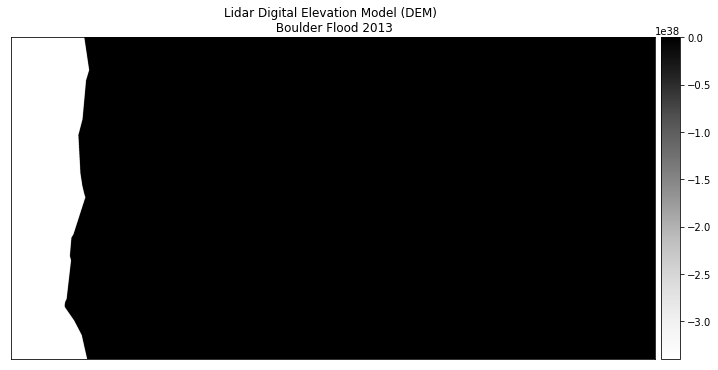

In [74]:
# Plot your data using earthpy
ep.plot_bands(dtm_pre_arr,
              title="Lidar Digital Elevation Model (DEM) \n Boulder Flood 2013",
              cmap="Greys")

plt.show()

The data above should represent terrain model data. However, the range of values is not what is expected. These data are for Boulder, Colorado where the elevation may range from 1000-3000m.

There may be some outlier values in the data that may need to be addressed. Below you check out the min and max values of the data.

In [75]:
print("the minimum raster value is: ", dtm_pre_arr.min())
print("the maximum raster value is: ", dtm_pre_arr.max())

the minimum raster value is:  -3.4028235e+38
the maximum raster value is:  2087.43


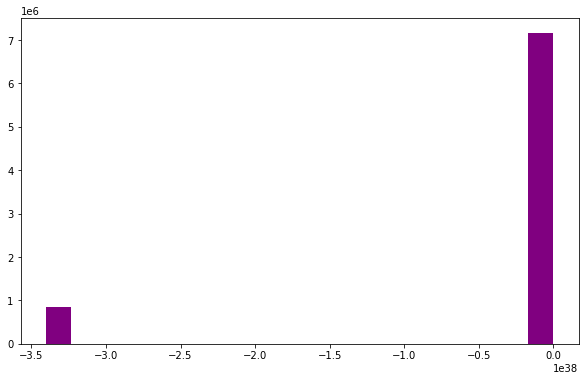

In [76]:
# A histogram can also be helpful to look at the range of values in your data
# What do you notice about the histogram below?
ep.hist(dtm_pre_arr,
        figsize=(10, 6))
plt.show()
# Always plot data while going through it to find errors
# shows distribution of values

Histogram for your LiDAR DTM. Notice the number of values that are below 0. This suggests that there may be no data values in the data.

### Raster Data Exploration - Min and Max Values
Looking at the minimum value of the data, there is one of two things going on that need to be fixed:

1. There may be no data values in the data with a negative value that are skewing your plot colors
2. There also could be outlier data in your raster

You can explore the first option - that there are no data values by reading in the data and masking no data values using rasterio. To do this, you will use the masked=True parameter for the .read() function - like this:

In [77]:
# Read in your data and mask the no data values
# Mask finds data values that are likely wrong
with rio.open(dem_pre_path) as dem_src:
    # Masked=True will mask all no data values
    dtm_pre_arr = dem_src.read(1, masked=True)

Notice that now the minimum value looks more like an elevation value (which should most often not be negative).

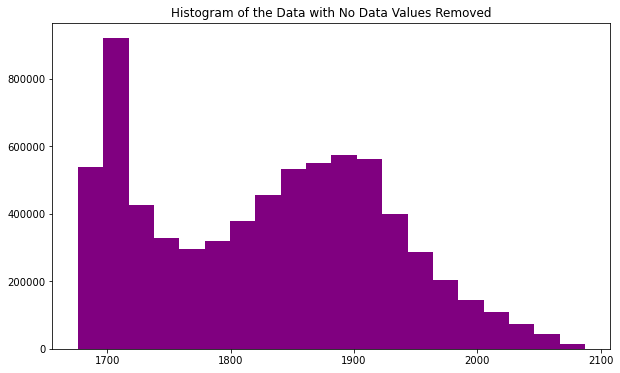

In [78]:
# A histogram can also be helpful to look at the range of values in your data
ep.hist(dtm_pre_arr,
        figsize=(10, 6),
        title="Histogram of the Data with No Data Values Removed")
plt.show()

Plot your data again to see how it looks:

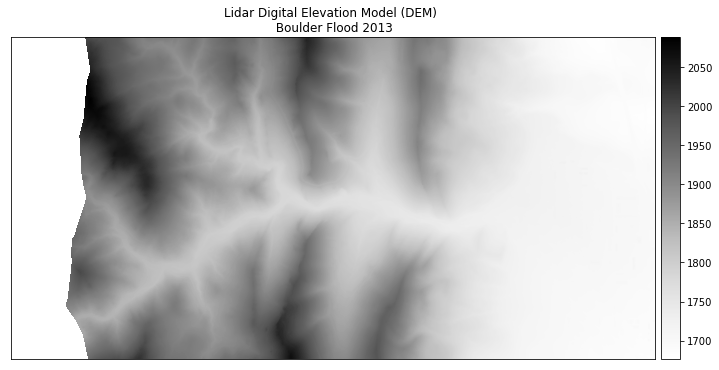

In [79]:
# Plot data using earthpy
ep.plot_bands(dtm_pre_arr,
              title="Lidar Digital Elevation Model (DEM) \n Boulder Flood 2013",
              cmap="Greys")

plt.show()

### TASK 1: Look closely at the plot above. What do you think the colors and numbers represent in the plot? What units do the numbers represents? Double click on the text in this box to enter your answer.

#####the numbers represent the elevation, and the color also corresponds with elevation. Larger numbers = darker colors = higher elevation. The numers/elevation is in meters.

### Rasterio Reads Files into Python as Numpy Arrays
When you call src.read() above, rasterio is reading in the data as a numpy array. A numpy array is a matrix of values. Numpy arrays are an efficient structure for working with large and potentially multi-dimensional (layered) matrices.

The numpy array below is type numpy.ma.core.MaskedArray. It is a masked array because you chose to mask the no data values in your data. Masking ensures that when you plot and perform other math operations on your data, those no data values are not included in the operations.

Learn more about working with numpy arrays: https://www.earthdatascience.org/courses/intro-to-earth-data-science/scientific-data-structures-python/numpy-arrays/ 

In [80]:
with rio.open(dem_pre_path) as dem_src:
    lidar_dem_im = dem_src.read(1, masked=True)

print("Numpy Array Shape:", lidar_dem_im.shape)
print("Object type:", type(lidar_dem_im))
# R has different way of dealing with unrealistic values, assign them as NAN (numpy.nan for python)

Numpy Array Shape: (2000, 4000)
Object type: <class 'numpy.ma.core.MaskedArray'>


A numpy array does not by default store spatial information. However, your raster data is spatial - it represents a location on the earth’s surface.

You can acccess the spatial metadata within the context manager using dem_src.profile. 

Notice that the .profile object contains information including the no data values for your data, the shape, the file type and even the coordinate reference system. 

You will learn more about raster metadata in our next class, but also see this chapter: https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/fundamentals-raster-data/raster-metadata-in-python/

In [81]:
with rio.open(dem_pre_path) as dem_src:
    lidar_dem_im = dem_src.read(1, masked=True) # <name of file>(1, masked = True)
    # Create an object called lidar_dem_meta that contains the spatial metadata
    lidar_dem_meta = dem_src.profile

lidar_dem_meta

# Always check metadata (data about your data)
# Access metadata from header file --> use <.profile> function

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028234663852886e+38, 'width': 4000, 'height': 2000, 'count': 1, 'crs': CRS.from_dict(init='epsg:32613'), 'transform': Affine(1.0, 0.0, 472000.0,
       0.0, -1.0, 4436000.0), 'blockxsize': 128, 'blockysize': 128, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}

### Context Managers to Open and Close File Connections
The steps above represent the steps you need to open and plot a raster dataset using rasterio in python. The with rio.open() statement creates what is known as a context manager. A context manager allows you to open the data and work with it. Within the context manager, Python makes a temporary connection to the file that you are trying to open.
```
with rio.open(`file-path-here`) as file_src:
    dtm_pre_arr = dem_src.read(1, masked=True)
```
To break this code down, the context manager has a few parts. First, it has a with statement. The with statement creates a connection to the file that you want to open. The default connection type is read only. This means that you can NOT modify that file by default. Not being able to modify the original data is a good thing because it prevents you from making unintended changes to your original data.

####### not making any changes (data stored on hard drive --> read in data, it only exists virtually in temp memory --> need to explicitly save data before exiting out of notebook/kernel)

#### Notice that the first line of the context manager is not indented. It contains two parts

1) rio.open(): This is the code that will open a connection to your .tif file using a path you provide.
file_src: this is a rasterio reader object that you can use to read in the actual data. You can also use this object to access the metadata for the raster file.

2) The second line of your with statement

dtm_pre_arr = dem_src.read(1, masked=True)

is indented. Any code that is indented directly below the with statement will become a part of the context manager. This code has direct access to the file_src object which is you recall above is the rasterio reader object.

Opening and closing files using rasterio and context managers is efficient as it establishes a connection to the raster file rather than directly reading it into memory.

Once you are done opening and reading in the data, the context manager closes that connection to the file. This efficiently ensures that the file won’t be modified later in your code.

You can get a better understanding of how the rasterio context manager works by taking a look at what it is doing line by line. Start by looking at the dem_pre_path object. Notice that this object is a path to the file pre_DEM.tif. The context manager needs to know where the file is that you want to open with Rasterio.

In [164]:
# Look at the path to your dem_pre file
dem_pre_path

'colorado-flood\\spatial\\boulder-leehill-rd\\pre-flood\\lidar\\pre_DTM.tif'

Now use the dem_pre_path in the context manager to open and close your connection to the file. Notice that if you print the “src” object within the context manager (notice that the print statement is indented which is how you know that you are inside the context manager), the returl is an

open DatasetReader

The name of the reader is the path to your file. This means there is an open and active connection to the file.

In [165]:
# Opening the file with the dem_pre_path
# Notice here the src object is printed and returns an "open" DatasetReader object
with rio.open(dem_pre_path) as src:
    print(src)

<open DatasetReader name='colorado-flood\spatial\boulder-leehill-rd\pre-flood\lidar\pre_DTM.tif' mode='r'>


If you print that same src object outside of the context manager, notice that it is now a closed datasetReader object. It is closed because it is being called outside of the context manager. Once the connection is closed, you can no longer access the data. This is a good thing as it protects you from inadvertently modifying the file itself!

In [166]:
# Note that the src object is now closed because it's not within the indented
# part of the context manager above
print(src)

<closed DatasetReader name='colorado-flood\spatial\boulder-leehill-rd\pre-flood\lidar\pre_DTM.tif' mode='r'>


Now look at what .read() does. Below you use the context manager to both open the file and read it. See that the read() method, returns a numpy array that contains the raster cell values in your file.

In [167]:
# Open the file using a context manager and get the values as a numpy array with .read()
with rio.open(dem_pre_path) as dem_src:
    dtm_pre_arr = dem_src.read(1)

dtm_pre_arr

# read in as array

array([[-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
         1.6956300e+03,  1.6954199e+03,  1.6954299e+03],
       [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
         1.6956000e+03,  1.6955399e+03,  1.6953600e+03],
       [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
         1.6953800e+03,  1.6954399e+03,  1.6953700e+03],
       ...,
       [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
         1.6814500e+03,  1.6813900e+03,  1.6812500e+03],
       [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
         1.6817200e+03,  1.6815699e+03,  1.6815599e+03],
       [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
         1.6818900e+03,  1.6818099e+03,  1.6817400e+03]], dtype=float32)

Because you created an object within the context manager that contains those raster values as a numpy array, you can now access the data values without needing to have an open connection to your file. This ensures once again that you are not modifying your original file and that all connections to it are closed. You are now free to play with the numpy array and process your data!


In [168]:
# View numpy array of your data
dtm_pre_arr

array([[-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
         1.6956300e+03,  1.6954199e+03,  1.6954299e+03],
       [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
         1.6956000e+03,  1.6955399e+03,  1.6953600e+03],
       [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
         1.6953800e+03,  1.6954399e+03,  1.6953700e+03],
       ...,
       [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
         1.6814500e+03,  1.6813900e+03,  1.6812500e+03],
       [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
         1.6817200e+03,  1.6815699e+03,  1.6815599e+03],
       [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
         1.6818900e+03,  1.6818099e+03,  1.6817400e+03]], dtype=float32)

You can use the .profile attribute to create an object with metadata on your raster image. The metadata object below contains information like the coordinate reference system and size of the raster image.

In [169]:
with rio.open(dem_pre_path) as dem_src:
    # Create an object called lidar_dem_meta that contains the spatial metadata
    lidar_dem_meta = dem_src.profile

lidar_dem_meta

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028234663852886e+38, 'width': 4000, 'height': 2000, 'count': 1, 'crs': CRS.from_dict(init='epsg:32613'), 'transform': Affine(1.0, 0.0, 472000.0,
       0.0, -1.0, 4436000.0), 'blockxsize': 128, 'blockysize': 128, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}

We're breaking our geotiff down into two parts: (a series of) arrays representing the data values for each pixel in our raster dataset, and the spatial metadata required to assign spatial coordiantes to this data.

## Raster calculations
Often we are interested in deriving information from our data. Common examples could include scaling data (changing units, apply a log transform, subtracting the mean and dividing by the standard deviation, setting the min and max value to 0 and 1 respectively but preserving the distribution), setting unrealistic values to NAs (for example, cloud masking), or reclassifying data. The fact that our raster data exists as a numpy array makes these types of operations simple. 

In [170]:
# read in data and metadata through raster connection
# MODIFY THIS CODE FOR TASK 3:
with rio.open(dem_pre_path) as dem_src:
    dem_data = dem_src.read(1)
    dem_meta = dem_src.profile

### TASK 2: dem_data above is reported in meters. Create a new raster, dem_feet, with units of feet:

In [171]:
#Task 2: 
dem_feet = dem_data*3.2808

#runtimewarning --> no problem

C:\Users\arrienzo\.conda\envs\geostats_env\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in multiply
  


In [172]:
#View values:
dem_feet.min(), dem_feet.max()

#min -inf is invalid data, should be assigned no data

(-inf, 6848.4404)

Here, -np.inf represents an invalid data which should be assigned a no-data value. We can create a no-data mask using our virtual data as well.

In [173]:
#Mask out negative infinity
dem_feet_ma = np.ma.masked_where(dem_feet == -np.inf,
                                        dem_feet,
                                        copy=True)
dem_feet_ma

#masking dem_feet raster, making no data where = -infinity

dem_feet_ma.min(), dem_feet_ma.max()

(5499.3096, 6848.4404)

### TASK 3: How could we read in dem_data with a mask so that we don't have to remove the -np.inf values? See code above.

In [245]:
#Task 3:
# read in raw dem data and metadata through raster connection
with rio.open(dem_pre_path) as dem_src:
    dem_data_ma = dem_src.read(1, masked = 'TRUE')
    dem_meta_ma = dem_src.profile
    
# use dem_data to create dem_feet_ma
dem_feet_ma = dem_data_ma*3.2808
# print out min and max values
dem_feet_ma.min(), dem_feet_ma.max()

(5499.3096, 6848.4404)

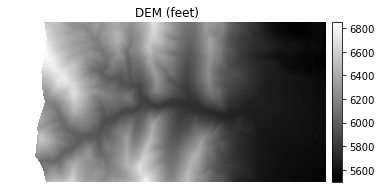

In [246]:
# plot the masked data to make sure it makes sense:
fig, ax = plt.subplots(figsize=(6, 6))

ep.plot_bands(dem_feet_ma,
              cmap='gray',
              title="DEM (feet)",
              scale=False,
              ax=ax)
ax.set_axis_off()
plt.show()

You can also reclassify your data and convert your continous raster into a categorical raster. For example, say that the elevation for permanent standing water in this region was 5642 feet. How could you create a map of just water extents based on the DEM?

In [247]:
# First, define bins that you want, and then classify the data
class_bins =[dem_feet.min(),5642,  np.inf]

In [248]:
# The np.digitize will create numeric cateogirles based on your class bins.
dem_waterline = np.digitize(dem_feet, class_bins)

In [249]:
# Note that you have an extra class in the data (0)
print(np.unique(dem_waterline))

[1 2]


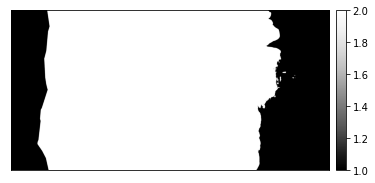

In [250]:
# Plot newly classified and masked raster
fig, ax = plt.subplots(figsize=(6,6))
ep.plot_bands(dem_waterline,
               ax=ax,
               scale=False)
plt.show()

### Here, we've ended up with three classified values. 
* 0 represents what was previously no data or masked regions of the raster, 
* 1 represents water, and 
* 2 represents land.

Often in raster manipulation, we want to use certain criteria to mask out raster data. Examples could include multiplying a multispectral satelite image by a cloud mask, or multiplying a SAR image by a terrain shadow mask. In this case, the "masks" that we're using represent seperate rasters that have been designed to tell us where we expect there to be limited information content in our raster. These "mask" layers have values of 1 for each pixel that we want to keep, and a no-data value for all other pixels. When you multiply the raster data by the mask, all the pixels that we want to keep are unchanged (value x 1 = value), and the pixels that we want to discard are converted to no-data (value x no-data = no-data).

### TASK 4: DEMs based on LiDAR will be inaccurate under standing water. Use your dem_waterline raster to create a "water_mask" for your DEM. This will be a raster with values of "1" where there is standing water, and no value everywhere else. Plot your water_mask.

In [251]:
# Task 4: create water_mask
# 1=land, no data for everything else
# then multiply mask by data --> strips out everything with no data

water_mask = np.ma.masked_where(dem_waterline == 1,
                                        dem_waterline,
                                        copy=True)

?np.ma.masked_where

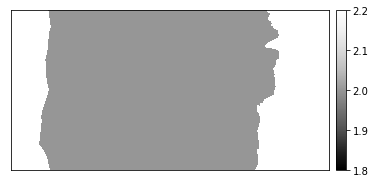

In [252]:
# Task 4: plot water_mask
fig, ax = plt.subplots(figsize=(6,6))
ep.plot_bands(water_mask,
               ax=ax,
               scale=False)
plt.show()

### TASK 5: Use your water mask to "mask" all regions in your DEM that are underwater. Print out the minimum and maximum values and plot your masked DEM.

In [256]:
#Task 5 create water_masked_DEM:
# Create/plot water masked DEM
dem_mask = dem_feet_ma * water_mask/2

In [257]:
#Task 5 print min and max:
dem_mask.min(), dem_mask.max()

(5642.0244140625, 6848.4404296875)

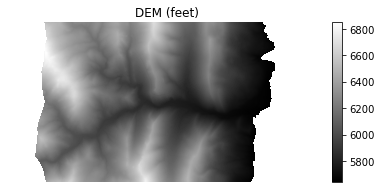

In [258]:
#Task 5 plot water_masked_DEM
fig, ax = plt.subplots(figsize=(6, 6))

ep.plot_bands(dem_mask,
              cmap = 'gray',
              title="DEM (feet)",
              scale=False,
              ax=ax)
ax.set_axis_off()
plt.show()

## Imagery - Another Type of Raster Data
Another type of raster data that you may see is imagery. If you have used Google Maps or another mapping tool that has an imagery layer, you are looking at raster data. You can open and plot imagery data using Python as well.

Below you download and open up some NAIP data that were collected before and after a fire that occured close to Nederland, Colorado.

Data Tip: NAIP data is imagery collected by the United States Department of Agriculture every 2 years across the United States. Learn more about NAIP data in this chapter of the earth data science intermediate textbook: https://www.earthdatascience.org/courses/use-data-open-source-python/multispectral-remote-sensing/intro-naip/

In [111]:
# Download NAIP data
# data before and after large wildfire
et.data.get_data(url="https://ndownloader.figshare.com/files/23070791")


'C:\\Users\\arrienzo\\earth-analytics\\data\\earthpy-downloads\\naip-before-after'

In [112]:
# Create a path for the data file - notice it is a .tif file
naip_pre_fire_path = os.path.join("earthpy-downloads",
                                  "naip-before-after",
                                  "pre-fire",
                                  "crop",
                                  "m_3910505_nw_13_1_20150919_crop.tif")

naip_pre_fire_path

'earthpy-downloads\\naip-before-after\\pre-fire\\crop\\m_3910505_nw_13_1_20150919_crop.tif'

In [113]:
# Open the data using rasterio
with rio.open(naip_pre_fire_path) as naip_prefire_src:
    naip_pre_fire = naip_prefire_src.read()

naip_pre_fire

array([[[113, 117, 137, ...,  54,  51,  74],
        [113, 117, 131, ...,  63,  54,  54],
        [111, 117, 120, ...,  78,  76,  52],
        ...,
        [191, 192, 193, ...,  58,  69,  76],
        [192, 192, 193, ...,  53,  62,  71],
        [193, 193, 193, ...,  51,  59,  66]],

       [[114, 114, 126, ...,  58,  54,  72],
        [114, 112, 120, ...,  70,  60,  58],
        [111, 114, 115, ...,  85,  87,  58],
        ...,
        [183, 184, 185, ...,  61,  75,  84],
        [184, 185, 185, ...,  56,  66,  78],
        [186, 186, 186, ...,  52,  58,  65]],

       [[ 80,  87,  95, ...,  55,  54,  63],
        [ 79,  83,  90, ...,  57,  55,  55],
        [ 81,  84,  87, ...,  62,  65,  55],
        ...,
        [161, 161, 163, ...,  54,  58,  64],
        [162, 164, 165, ...,  53,  58,  62],
        [165, 166, 166, ...,  51,  54,  57]],

       [[145, 143, 139, ...,  74,  47,  65],
        [145, 146, 139, ...,  98,  59,  57],
        [142, 144, 144, ..., 119, 107,  54],
        ..

### TASK 6: Read in and print the image metadata.

In [114]:
# Task 6:
with rio.open(naip_pre_fire_path) as naip_prefire_src:
    naip_pre_fire = naip_prefire_src.read()
    fire_meta = naip_prefire_src.profile

print(fire_meta)

{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32768.0, 'width': 4377, 'height': 2312, 'count': 4, 'crs': CRS.from_wkt('PROJCS["UTM Zone 13, Northern Hemisphere",GEOGCS["GRS 1980(IUGG, 1980)",DATUM["unknown",SPHEROID["GRS80",6378137,298.257222101],TOWGS84[0,0,0,0,0,0,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]'), 'transform': Affine(1.0, 0.0, 457163.0,
       0.0, -1.0, 4426952.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}


Plotting imagery is a bit different because imagery is composed of multiple bands. While we won’t get into the specifics of bands and images in this lesson, you can see below that an image is composed of multiple layers of information.

You can plot each band individually as you see below using plot_bands(). Or you can plot a color image, similar to the image that your camera stores when you take a picture.

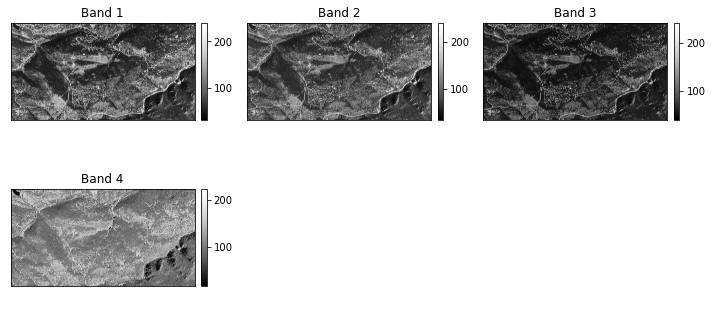

In [115]:
# Plot each layer or band of the image separately
ep.plot_bands(naip_pre_fire, figsize=(10, 5))
plt.show()

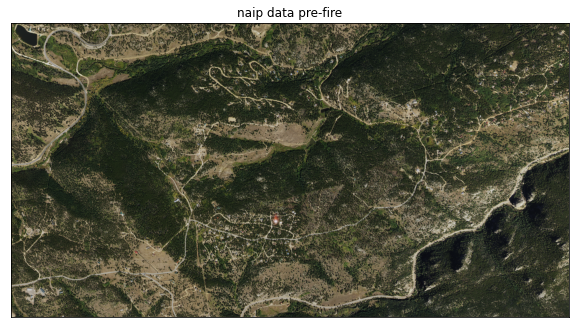

In [116]:
# Plot of all NAIP Data Bands using earthpy plot_bands()
# Plot color image
ep.plot_rgb(naip_pre_fire,
            title="naip data pre-fire")
plt.show()

### TASK 6: Calculate NDVI 
The normalized difference vegetation index is a metric of vegetation health calculated from the red and near infared bands of multispectral imagery.

```
NDVI = (NIR – Red) / (NIR + Red)
```

Create a new raster called NDVI_pre that calculates the NDVI in the pre-fire image. Make a plot of NDVI_pre.

In [120]:
red_pre_fire=naip_pre_fire[0] # red and NIR bands
NIR_pre_fire=naip_pre_fire[3]

# Task 6: create NDVI_pre
NDVI_pre = (NIR_pre_fire-red_pre_fire)/(NIR_pre_fire + red_pre_fire)

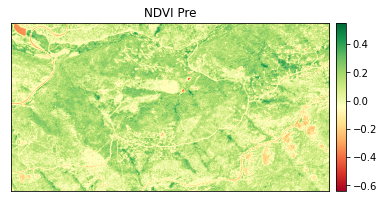

In [125]:
#Task 6: plot NDVI_pre
fig, ax = plt.subplots(figsize=(6,6))
ep.plot_bands(NDVI_pre,
               ax=ax,
              cmap = 'RdYlGn',
              title= 'NDVI Pre',
               scale=False)
plt.show()

### TASK 7: Plot post-fire data
In the code below, you see a path to a NAIP imagery of the region in Colorado that was collected after the fire in Colorado. Use that path to:

1. Open the post fire data
2. Plot a color version of data using plot_rgb()


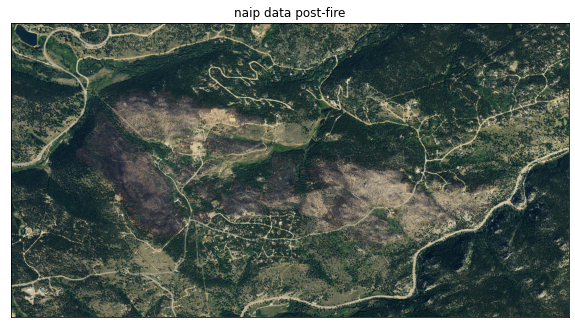

In [128]:
# Add the code here to open the raster and read the numpy array inside it

# Create a path for the data file - notice it is a .tif file
naip_post_fire_path = os.path.join("earthpy-downloads",
                                   "naip-before-after",
                                   "post-fire",
                                   "crop",
                                   "m_3910505_nw_13_1_20170902_crop.tif")

# Task 7: open naip_post_fire
with rio.open(naip_post_fire_path) as naip_postfire_src:
    naip_post_fire = naip_postfire_src.read()

naip_post_fire

# Task 7: plot naip_post_fire (as false color composite)

ep.plot_rgb(naip_post_fire,
            title="naip data post-fire")
plt.show()

### TASK 8: Fire kills vegetaion. Make a map showing fire damage by comparing NDVI_pre fire with an NDVI_post fire:

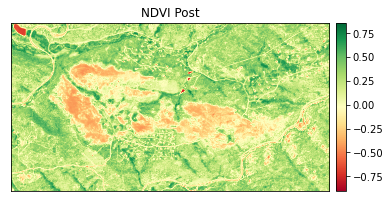

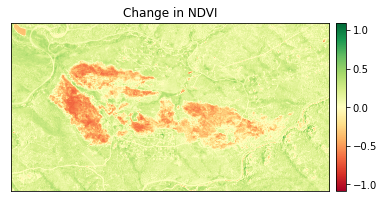

In [135]:
# Task 8: create NDVI_post (create image representing change in vegetation from fire)
red_post_fire=naip_post_fire[0]
NIR_post_fire=naip_post_fire[3]

NDVI_post = (NIR_post_fire-red_post_fire)/(NIR_post_fire + red_post_fire)

fig, ax = plt.subplots(figsize=(6,6))
ep.plot_bands(NDVI_post,
               ax=ax,
              cmap = 'RdYlGn',
              title= 'NDVI Post',
               scale=False)
plt.show()
# Task 8: map change in NDVI
NDVI_change = NDVI_post - NDVI_pre

fig, ax = plt.subplots(figsize=(6,6))
ep.plot_bands(NDVI_change,
               ax=ax,
              cmap = 'RdYlGn',
              title= 'Change in NDVI',
               scale=False)
plt.show()